In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
data = pd.read_csv(r"C:\Users\anasw\OneDrive\Desktop\Analyst datasets\shopping_trends_updated.csv")
df = pd.DataFrame(data)

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
item_type = df["Item Purchased"].unique().tolist()
item_type

['Blouse',
 'Sweater',
 'Jeans',
 'Sandals',
 'Sneakers',
 'Shirt',
 'Shorts',
 'Coat',
 'Handbag',
 'Shoes',
 'Dress',
 'Skirt',
 'Sunglasses',
 'Pants',
 'Jacket',
 'Hoodie',
 'Jewelry',
 'T-shirt',
 'Scarf',
 'Hat',
 'Socks',
 'Backpack',
 'Belt',
 'Boots',
 'Gloves']

In [9]:
df["Category"].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [17]:
item_wise_sales = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum()

df_sales =pd.DataFrame(item_wise_sales)
df_sales.reset_index()

,Item Purchased,Purchase Amount (USD)
0,Backpack,8636
1,Belt,9635
2,Blouse,10410
3,Boots,9018
4,Coat,9275
5,Dress,10320
6,Gloves,8477
7,Handbag,8857
8,Hat,9375
9,Hoodie,8767


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


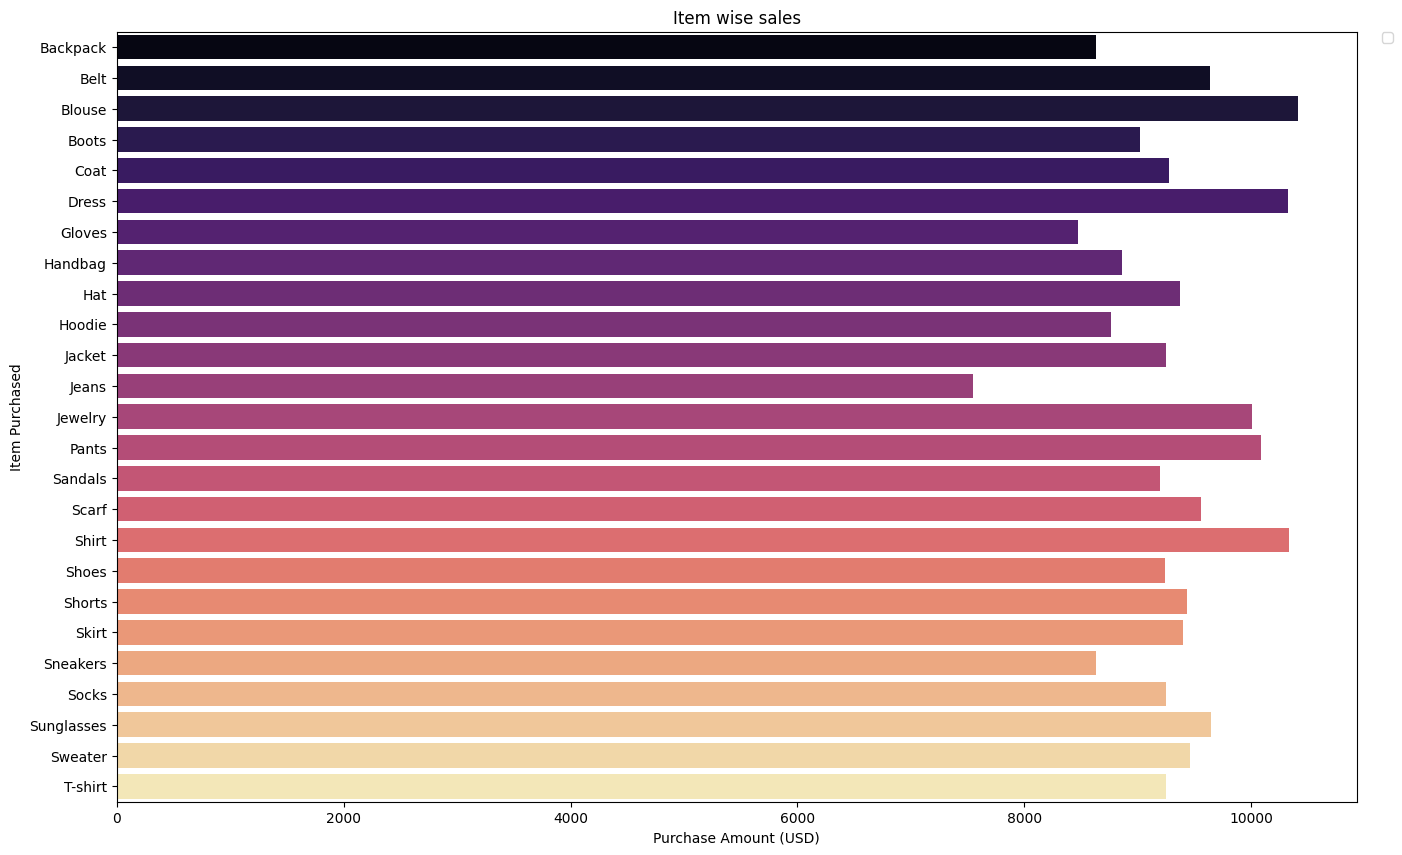

In [40]:
plt.figure(figsize=(16,10))
sns.barplot(data = df_sales , y = "Item Purchased" , x = "Purchase Amount (USD)" , palette = "magma" , hue = 'Item Purchased')
plt.title("Item wise sales")
plt.show() 

In [24]:
print("MAX Purchase amounnt = " , df_sales["Purchase Amount (USD)"].max())
print("MIN Purchase amounnt = " , df_sales["Purchase Amount (USD)"].min())

MAX Purchase amounnt =  10410
MIN Purchase amounnt =  7548


In [28]:
category_wise_sales = df.groupby("Category")["Purchase Amount (USD)"].sum()
df_sales_cat = pd.DataFrame(category_wise_sales)
df_sales_cat.reset_index()

,Category,Purchase Amount (USD)
0,Accessories,74200
1,Clothing,104264
2,Footwear,36093
3,Outerwear,18524


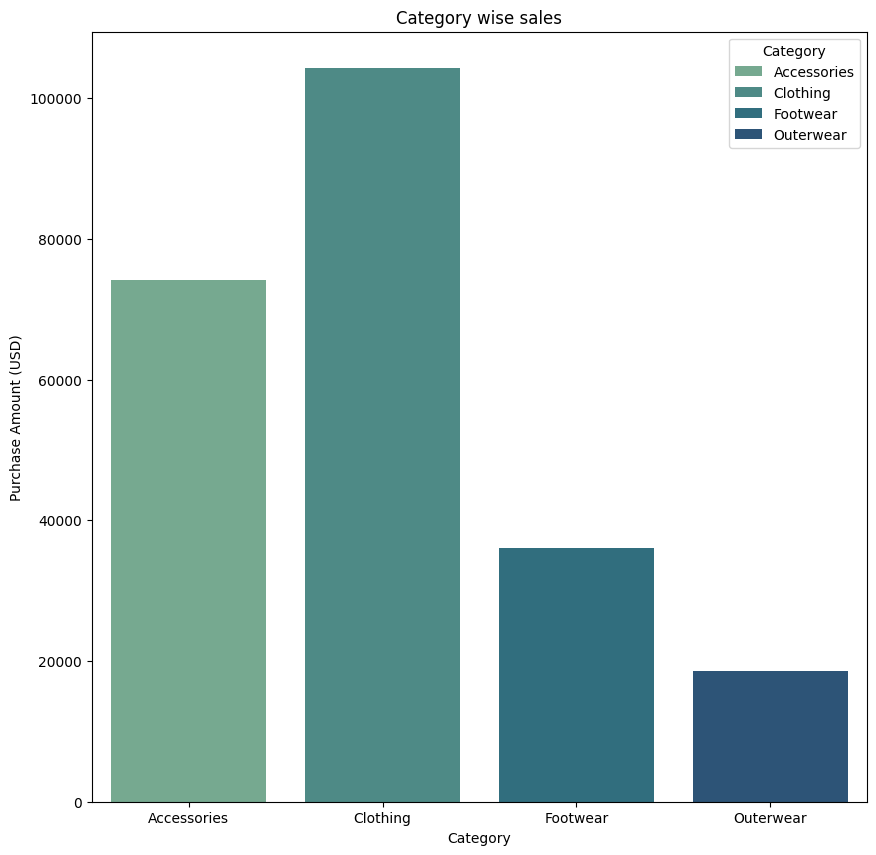

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(data = df_sales_cat , x = "Category" , y = "Purchase Amount (USD)" , palette = "crest" , hue = 'Category' ,legend=True)
plt.title("Category wise sales")
plt.show() 

In [93]:
location_wise_sales = df.groupby("Location")["Purchase Amount (USD)"].sum()
df_sales_loc = pd.DataFrame(location_wise_sales)
df_sales_loc = df_sales_loc.reset_index()


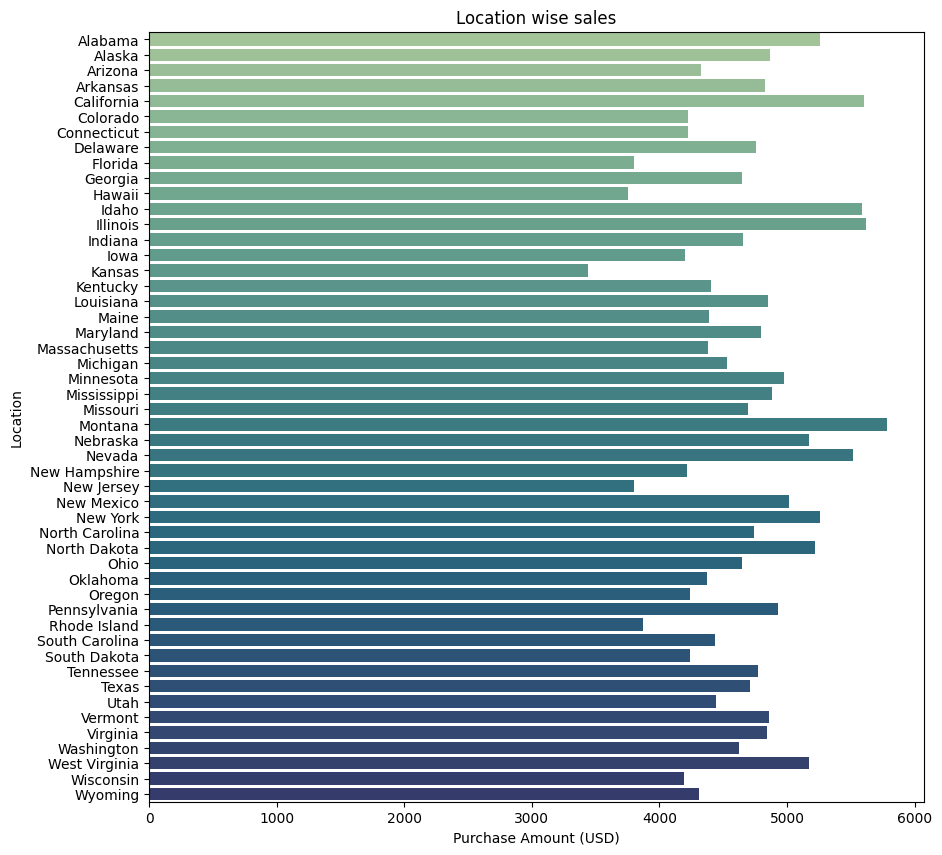

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(data = df_sales_loc , y = "Location" , x = "Purchase Amount (USD)" , palette = "crest" , hue = 'Location')
plt.title("Location wise sales")
plt.show() 

In [96]:
import plotly.express as px


fig = px.bar(
    df_sales_loc,  
    y="Location",  
    x="Purchase Amount (USD)",  
    color="Location",  
    title="Location wise sales",  
)
fig.show()



Run the above code in a Jupyter notebook on Google Collab 
Select locations accordingly and view the BAR.

In [53]:
print("Frequency of payment methods" , df["Payment Method"].value_counts())

Frequency of payment methods Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


In [54]:
print("Frequency of sizes" , df["Size"].value_counts())

Frequency of sizes Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64


In [55]:
print("Frequency of seasons" , df["Season"].value_counts())

Frequency of seasons Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


In [56]:
print("Frequency of colors" , df["Color"].value_counts())

Frequency of colors Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64


In [57]:
print("Frequency of Shipping Type" , df["Shipping Type"].value_counts())

Frequency of Shipping Type Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


In [58]:
df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [111]:
df_season = df.groupby("Season")["Purchase Amount (USD)"].sum()
df_season = pd.DataFrame(df_season)
df_season = df_season.reset_index()

df_season

,Season,Purchase Amount (USD)
0,Fall,60018
1,Spring,58679
2,Summer,55777
3,Winter,58607


In [63]:

import plotly.graph_objects as go
df_agg = df_sales_loc.groupby("Location")["Purchase Amount (USD)"].sum().reset_index()
fig = go.Figure(data=[go.Pie(labels=df_agg["Location"], values=df_agg["Purchase Amount (USD)"], hole=0.6)])
fig.update_layout(title="Distribution of Purchase Amount by Location")
fig.show()


In [66]:
df["Review Rating"].value_counts().sort_values(ascending=False)

Review Rating
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: count, dtype: int64

In [99]:
f_purchases = df["Frequency of Purchases"].value_counts()
f_purchases

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [102]:
print("Total sales in USD:" , df["Purchase Amount (USD)"].sum())

Total sales in USD: 233081


In [115]:
fig = px.bar(
    df_season,
    x="Season",
    y="Purchase Amount (USD)",
    color="Season",
    title="Season wise sales"
)

fig.update_layout(showlegend=True)

fig.show()

In [116]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

"The following is a report on the sales of a Clothing Business which includes the following factors: 
1. Location wise sales report 
2. Season Wise sales 
3. Gender Distribution 
4. Ratings 
5. Payment Methods Used 
6. Category Wise Sales 